In [1]:
# Assign input x and observed output b
import numpy as np
import matplotlib.pyplot as plt
import math
x=np.arange(-.5,.6,.1)
pii=math.pi
b=np.sin(2*pii*x)



In [2]:
#create the third (m=3) order polynomial matrix X
def calc_matrix(x,m):
  n=len(x)
  #m=3
  A=np.zeros((n,m+1))
  for i in range(m+1):
      A[:,i]=x**i
      #A[:,1]=x
      #A[:,2]=np.square(x)
      #A[:,3]=x**3
  
  return A



In [3]:
#calculate the matrix A
A=calc_matrix(x,3)


In [4]:
#calculate w with regression
#a1=np.dot(np.transpose(A),A)
#a1_inv=np.linalg.inv(a1)
#a1_inv.shape
#a2=np.dot(a1_inv,np.transpose(A))
#a3=np.dot(a2,b)
#w=a3
#print(w)

[-2.22044605e-16  5.17147161e+00  1.16573418e-15 -2.11939582e+01]


In [ ]:
#calculate y when m=3
#y3=np.dot(A,w)
#y3

In [4]:
#The taylor series expansion of sin(x)=x-(1/3!)x^3
x1=np.arange(-.5,.6,.1)
xt=2*pii*x1               #here x1=xt
y_taylor=xt-(xt**3)*(1/math.factorial(3))

In [5]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    m=y.size
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs




In [22]:
#Pass the relevant variables to the function and get the new values of weights back fir gradient decent
iter=3000
l=1.5
w1=np.random.rand(4)
W, costs = gradient_descent(A, y_taylor, w1, iter, l)
w_new = W[-1]
y_gradient=np.dot(A,w_new)
w_new

array([-2.84014488e-16,  5.64018514e+00,  1.82010341e-15, -3.77490024e+01])

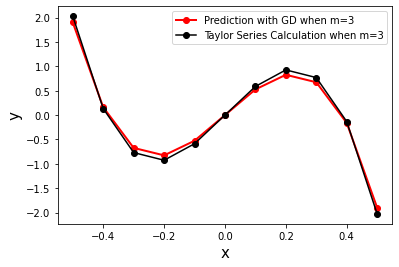

In [23]:
#plt.plot(x, b, linestyle='--',marker='.',color='black',label='Actual Observation',linewidth=2)  
plt.plot(x, y_gradient, 'r',marker='o',label='Prediction with GD when m=3',linewidth=2) 
plt.plot(x1, y_taylor,'black',marker='o',label='Taylor Series Calculation when m=3',linewidth=1.5)
plt.xlabel('x',fontsize='15')
plt.ylabel('y',fontsize='15')
plt.legend()

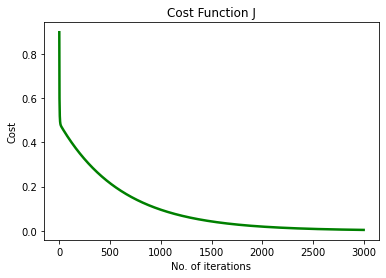

In [25]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(costs,'green',linewidth=2.5)
plt.show()